# Analyze Meta Data
Load and analyze the Meta Data

In [1]:
import numpy as np
import os as os
import sys as sys
import multiprocessing as mp
import pandas as pd
import socket
import matplotlib.pyplot as plt
import matplotlib.dates as dts
from datetime import date, timedelta, time, datetime

### For Arial Font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']  # Make sure to have the font installed (it is on cluster for Harald)
rcParams['axes.linewidth'] = 0.2  # Set the Default Size of the Boundary for small 2.25in width figures

### Pick the right path (whether on cluster or at home)
socket_name = socket.gethostname()
print(f"Current machine: {socket_name}")
if socket_name == "DESKTOP-5RJD9NC":
    path = "/gitProjects/covid19_data"   # The Path on Harald's machine
elif socket_name.startswith("compute-"):
    print("HSM Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/covid19_data/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd())


sys.path.append("./notebooks/analysis/")
from plot_meta_data import plot_cumulative_dates,plot_hist,plot_hist_dates

Current machine: compute-a-16-169.o2.rc.hms.harvard.edu
HSM Computational partition detected.
/n/groups/reich/hringbauer/git/covid19_data


### Read the Data

In [3]:
path = "./data/may20/metadata.tsv"
#"data", month, f"metadata{day}.tsv"
data_path = os.path.join(path)
df = pd.read_csv(data_path, sep="\t")
print(f"Loaded {len(df)} Sequences")

df["region"].value_counts()

Loaded 17526 Sequences


Europe           9624
North America    4991
Oceania          1353
Asia             1251
Africa            161
South America     146
Name: region, dtype: int64

# Do a plot per Region

In [4]:
color_dict = {"Europe": "lime",
              "Asia": "blue",
              "North America":"red",
              "Oceania":"lightskyblue",
              "South America":"orange",
              "Africa":"gray",
              "Central America":"gray"
              }

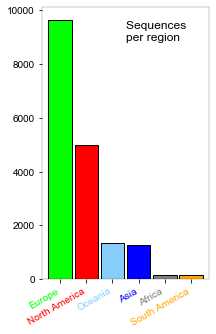

In [5]:
plot_hist(df, color_dict, 
          figsize=(3,5), savepath="") # ./figures/dumpster/covid19_hist.png

## Plot Dates

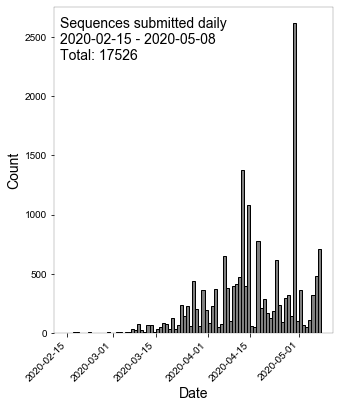

In [6]:
dates =  pd.to_datetime(df["date_submitted"]) #.apply(lambda x: date(x.year,x.month,x.day))
plot_hist_dates(dates, color="gray",
                date_last=date.today(), date_first=date(year=2020, month=2, day=15))

# Plot cumulative Dates

Saved to ./figures/dumpster/covid19_cum.png


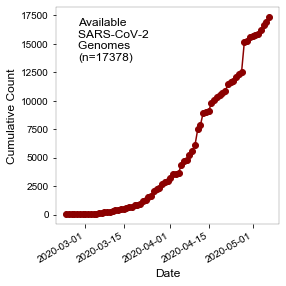

In [7]:
dates =  pd.to_datetime(df["date_submitted"])
plot_cumulative_dates(dates, figsize=(4,4), fs=12, color="#8b0000",
                      savepath="./figures/dumpster/covid19_cum.png",
                      days_back=75, scale="linear")   # ./figures/dumpster/covid19_cum.png"